<a href="https://colab.research.google.com/github/muasifk/colab.ai/blob/master/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Image Processing in Python**

In this note book, we will learn basic image processing using python.

In [0]:
# Load some useful libraries
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

##**1. Reading Images**


In [0]:
# Reading an image from URL
url = "https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg"
image = io.imread(url) 
cv2_imshow(image)

In [7]:
# Check Image details
print('Height Width Channel:', image.shape)

Height Width Channel: (552, 800, 3)


##**2. Image Conversions**

> 150 color-space conversion methods available in OpenCV

In [0]:
# Change colorspace from BGR to RGB
image2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cv2_imshow(image2)

# Change colorspace from BGR to Grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

##**3. Histograms**

In [0]:
# Display the histogram of all the pixels in the color image
plt.hist(image.ravel(),bins = 256, range = [0,256]) 
plt.show()

In [0]:
# Display the histogram of R, G, B channel
# We could observe that the green channel has many pixels in 255, which represents the white patch in the image
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [0]:
# Plot the histogram of the gray image.
# We could observe that the frequency of the image hist has decreased ~ 1/3 of the histogram of color image
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()

##**4. Contours**


In [0]:
# Using matplotlib
plt.contour(gray_image, origin = "image")

# Using OpenCV
# Set threshold for the countour detection
ret, thresh = cv.threshold(gray_image,150,255,0)
im2, contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(image, contours, -1, (0, 255, 0), 3)
plt.imshow(image)


##**5. Image Transformation**


In [0]:
# Inverse operation
# bright pixels become dark, and the dark pixels become bright
im2 = 255 - gray_image
cv2_imshow(im2)

In [0]:
# Adding a constant, 
# All pixels become brighter and a hazing-like effect of the image is generated
im3 = (100.0/255)*gray_image + 100
cv2_imshow(im3)

In [0]:
# Decrease lightness level
im4 = 255.0*(gray_image/255.0)**2
cv2_imshow(im4)

##**6. Histogram Equalization**
This transform flattens the gray-level histogram so that all intensities are as equally common as possible. The transform function is a cumulative distribution function (cdf) of the pixel values in the image (normalized to map the range of pixel values to the desired range). 


In [0]:
# function of histogram equalization
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

# apply the function on your dark image to increase the contrast
# we could observe that the contrast of the black background has increased
im5 = histeq(im4)
cv2_imshow(im5)

In [0]:
# Histogram Before Equalization
plt.hist(im4.ravel(),bins = 256, range = [0, 256])
plt.show()

In [0]:
# Histogram After Equalization
plt.hist(im5.ravel(),bins = 256, range = [0, 256])
plt.show()

##**7. Fourier Transform**
To find the frequency domian of an image.

> Edges and noises are high frequency contents in an image because they change drastically in images.

In [0]:
# Blur the grayscale image by a Guassian filter with kernel size of 10
imBlur = cv.blur(gray_image,(5,5))
# Transform the image to frequency domain
f = np.fft.fft2(imBlur)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

##**8. Find Images using High Pass Filter**
Remove the low frequency component, resulting in a sharpened image which contains the edges

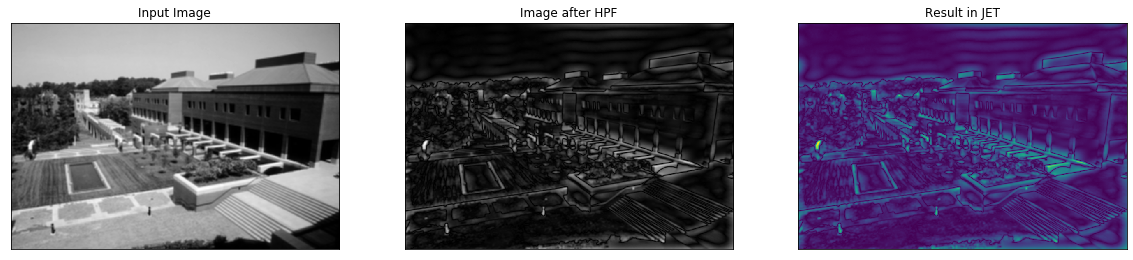

In [24]:
rows, cols = imBlur.shape
crow,ccol = round(rows/2) , round(cols/2)
# remove low frequencies with a rectangle size of 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()